In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ai_client
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *
from src.agents.news_filtering_agent import *
from src.agents.trading_agent import *

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
ai_client.create(
    [
        ai_client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        ai_client.make_msg(
            text="What's in this image?",
            img="https://cdn.midjourney.com/ca13f713-b289-45ee-92fe-b1276a1dc833/0_3.webp",
        ),
    ],
    format=JSON_MODE,
)

'{"description": "This is an artistic depiction of a young woman with vivid red hair and striking blue eyes. She is wearing a black bikini and is posed with her arms raised above her head. The background is a simple, soft blue tone that complements the vibrant red of her hair.", "style": "The image is drawn in a highly detailed, realistic digital art style with a focus on soft lighting and smooth textures."}'

In [37]:
plt.plot(np.sin(np.array(range(300)) * 0.1))

ai_client.create(
    [
        ai_client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        ai_client.make_msg(
            text="What's in this image?",
            img=plt,
        ),
    ],
    format=JSON_MODE,
)

'{\n  "description": "The image displays a sinusoidal wave graphed on a coordinate system. The x-axis ranges from 0 to 300 and the y-axis ranges from -1.00 to 1.00. The waveform illustrates multiple cycles of a smooth, continuous sine wave.",\n  "style": "This is a classic line graph with a mathematical or scientific feel, using a blue line to represent the data on a grid background."\n}'

In [71]:
day_history = get_day_history("TON")
week_history = get_week_history("TON")
month_history = get_month_history("TON")

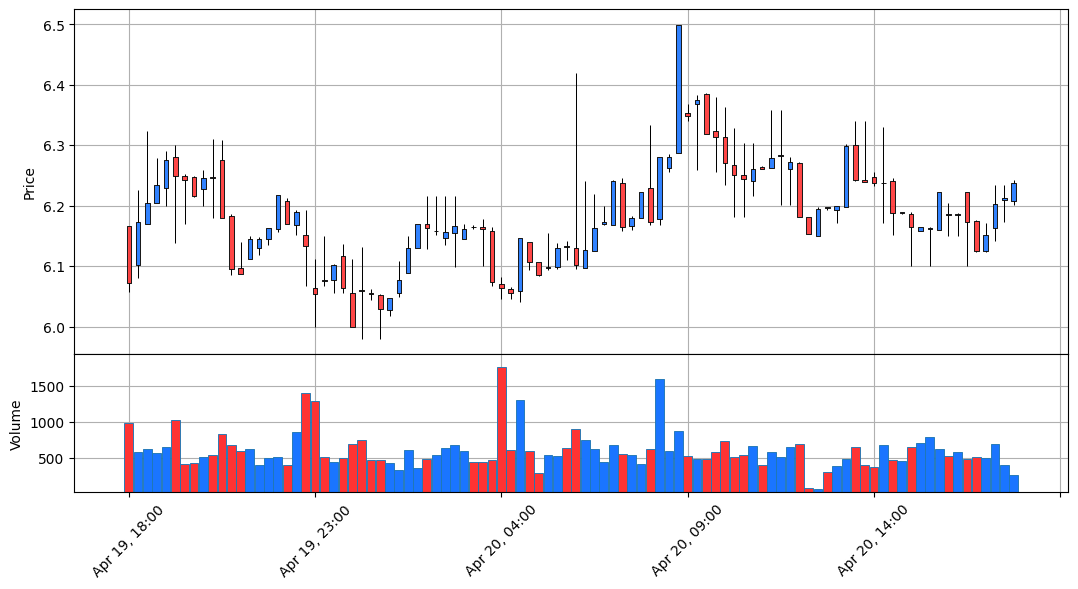

In [72]:
make_candlebars(day_history)

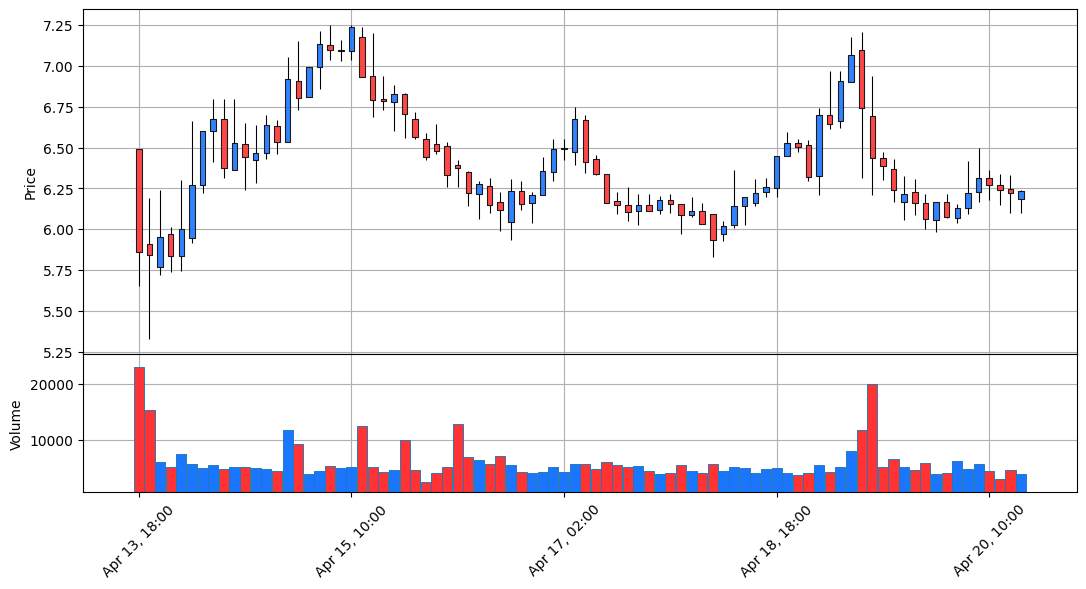

In [73]:
make_candlebars(week_history)

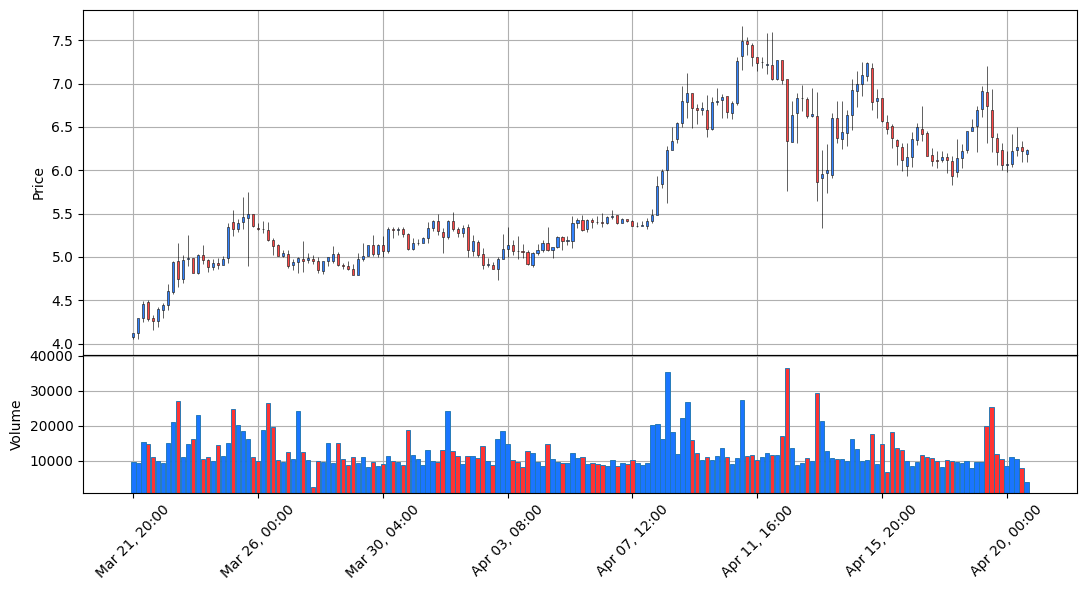

In [74]:
make_candlebars(month_history)

In [78]:
napi = NewsApi()
news = napi.get_news("Toncoin", start_date="2024-04-15")

filtering_agent = NewsFilteringAgent()
filtered_news = filtering_agent.filter_news(news)

json.loads(filtered_news)

{'headlines': ['Telegram to tokenize emojis and stickers as NFTs on TON blockchain',
  'Toncoin price rises as TON Foundation and Tether partner to bring USDT to TON blockchain',
  'Toncoin surges 25% to tally all-time high'],
 'sentiment': 'Positive',
 'description': "Recent developments in the TON coin, particularly through Telegram's integration efforts, have displayed positive trend dynamics. Telegram's initiative to tokenize emojis and stickers as NFTs on the TON blockchain and its integration with USDT through Tether's partnership indicate a broadening utilization and increased adoption prospects. These strategic expansions have coincided with notable price surges for Toncoin, at one point achieving an all-time high of $7.0, primarily fueled by the rapid market capitalization expansion and increased investor interest. The addition of Tether's USDT and XAUT on the TON blockchain also marks a significant ecosystem growth, further enhancing Toncoin’s attractiveness as a formidable a

[{'role': 'system', 'content': 'You are professional trader.\n            You have deep knowledge of cryptocurrencies and trading markets, and you can maximize profits the most efficiently.\n            You trade in USDT.\n            \n            You an only buy or sell at the current price, you can not set stop loss.\n            Avoid spending all money in one deal.\n            \n            Respond with json of this format: \n            {\n                \'description\': what you see on charts, general short and long term trends, \n                \'trend_analysys\': rough prediction of near future development of coin,\n                \'techical_analysys\': visual technical analysis of plot and indicators,\n                \'optimal_strategy": optimal trading strategy to maximize profits in this situation,\n                \'final_decision\': what to do, possible variants: \'sell\', \'buy\', \'hold\' (do nothing),\n                \'amount\': amount of coin to buy or sell, 0 i
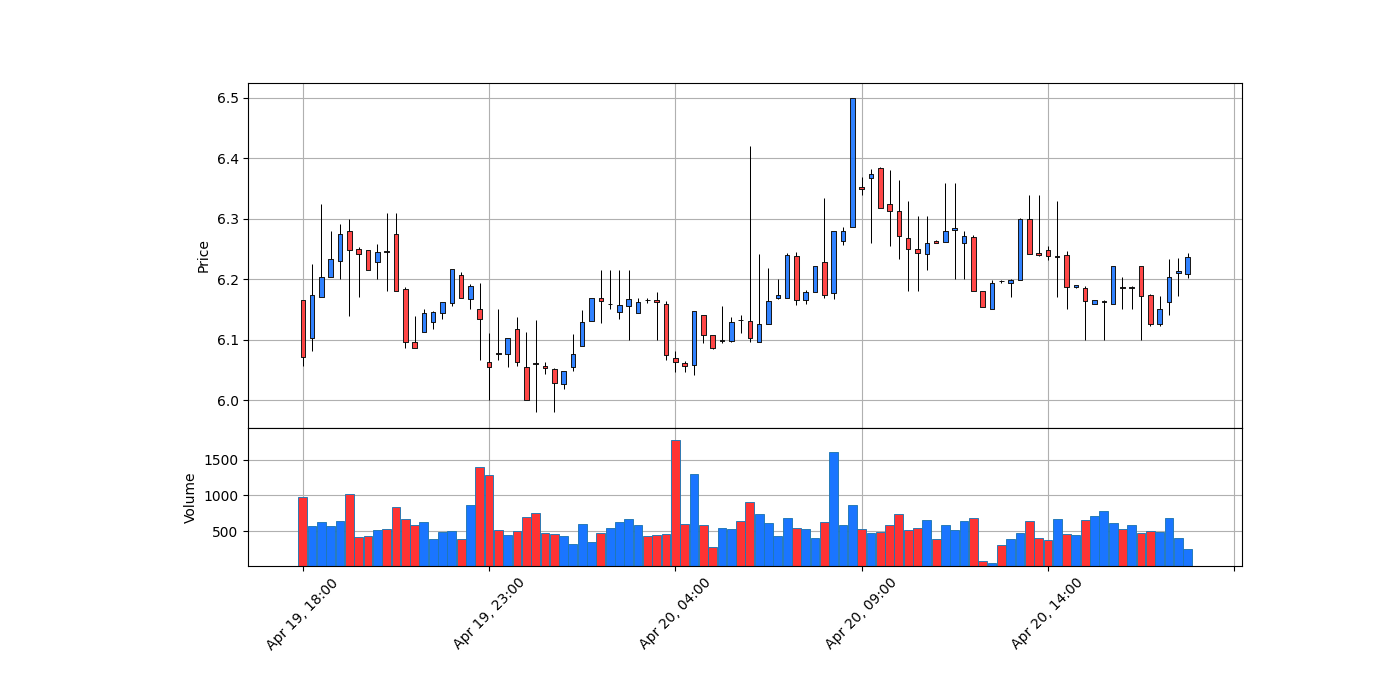
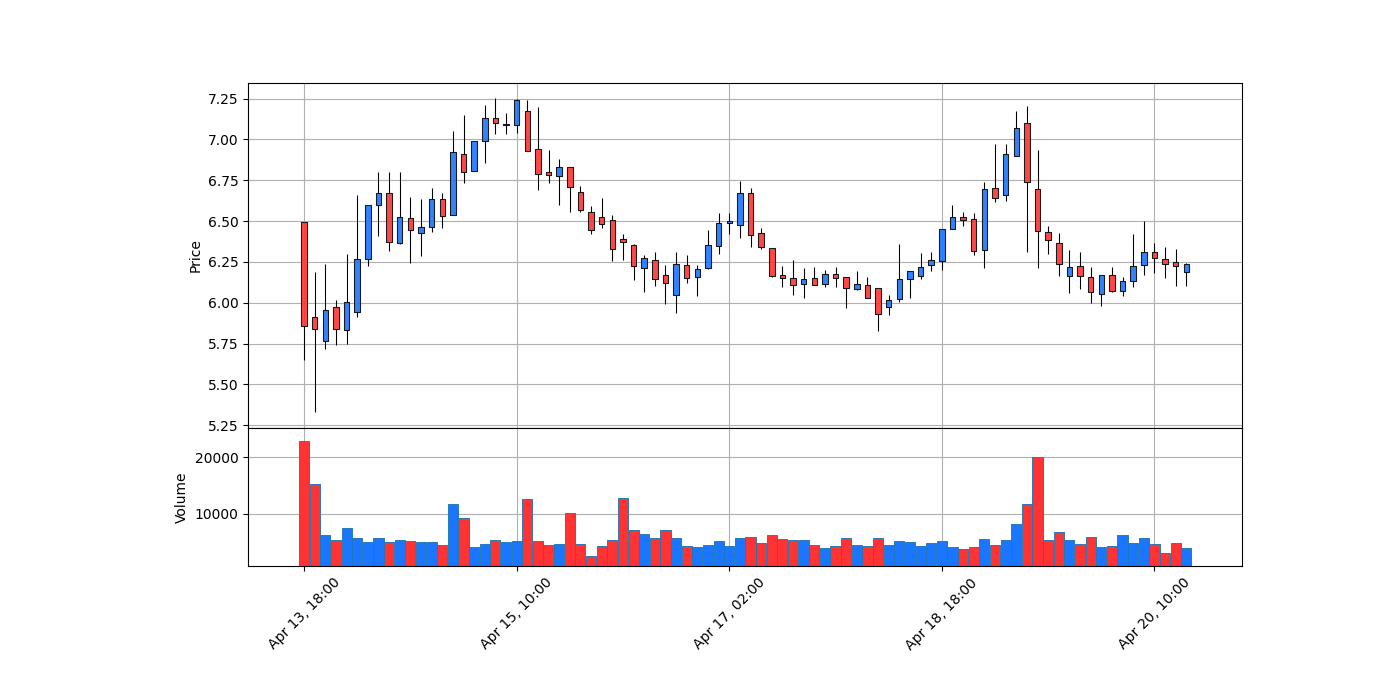
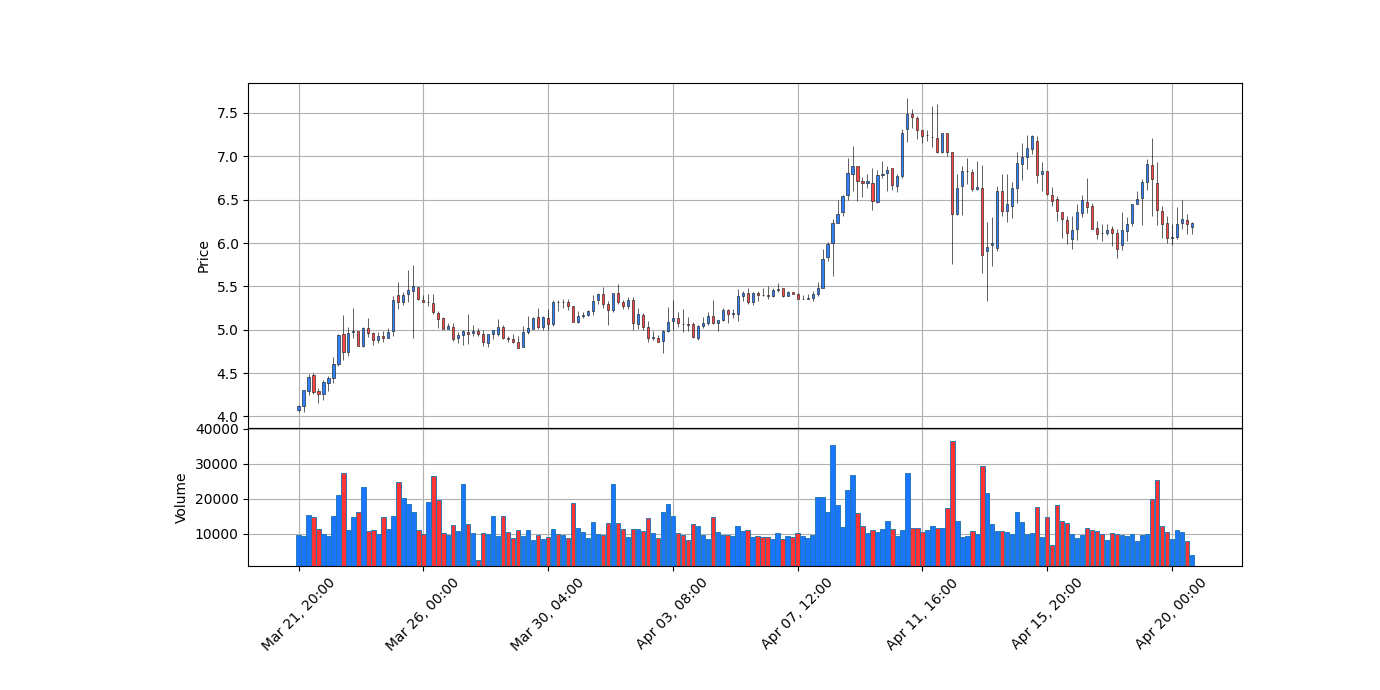

{'description': 'Analyzing the three provided price history charts of TON spanning daily, weekly, and monthly periods, the price action reveals varying dynamics. In the daily chart, the price has fluctuated, showing notable intra-day volatility around the range of $6.0 to $6.5. The weekly chart indicates a decline from a peak of approximately $7.0, stabilizing around $6.25 recently which was also the all-time high reached before declination commenced. The monthly chart shows an overall uptrend, with the price rising from around $4.5 to highs of $7.0 before stabilizing towards the range of $6.0 to $6.5 in recent days. Volume metrics amplify during significant price movements, reflecting heightened trading activity during those periods.',
 'trend_analysis': 'The recent news regarding TON has been overwhelmingly positive, including strategic partnerships and technical advancements like NFT integration and collaborations with Tether. This broadens its ecosystem and market adoption, which c

In [80]:
trading_agent = TradingAgent()
predict = trading_agent.decide(
    coin="TON",
    news=filtered_news,
    day_data=day_history,
    week_data=week_history,
    month_data=month_history,
    operations_history=[
        {"action": "buy", "amount": 1, "price": 6.286, "date": "20.04 08:41"}
    ],
    current_balance={"TON": 1, "USDT": 56.14},
    verbose=True
)

json.loads(predict)